### Problem Statement: Use decision trees to prepare a model on fraud data, treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
cf.go_offline()

from plotly.subplots import make_subplots
import plotly.express as px

from sklearn.preprocessing import LabelEncoder

#### Load dataset

In [2]:
fc_df = pd.read_csv("Fraud_check.csv")

#### Read dataset

In [3]:
fc_df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


#### EDA on dataset

In [4]:
# Check first 5 records
fc_df.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
# Check last 5 records
fc_df.tail(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [6]:
# Check for data types, non-null values & memory usage
fc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
# Get central tendency, dispersion and shape of dataset’s distribution
fc_df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
# Checking Null values
fc_df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<font size = 3 color = darkblue>There are no NULL values in the dataset, hence it is clean.</font>

In [9]:
# Check for the column labels of the DataFrame
fc_df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [10]:
# Check the dimensions of the DataFrame
fc_df.shape

(600, 6)

In [11]:
# Check for the random sample from the DataFrame
fc_df.sample(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
559,YES,Divorced,72026,180424,26,NO
464,NO,Married,48825,143349,16,YES
233,NO,Married,10003,63701,19,YES
250,NO,Married,31591,156973,16,NO
84,NO,Married,69098,178083,4,YES


In [12]:
# Get count of Taxable Income
fc_df['Taxable.Income'].value_counts()

59689    2
23884    1
91462    1
39144    1
33092    1
        ..
52891    1
98970    1
24215    1
15532    1
77082    1
Name: Taxable.Income, Length: 599, dtype: int64

In [13]:
lbe = LabelEncoder()

fc_df["Undergrad"] = lbe.fit_transform(fc_df["Undergrad"])
fc_df["Marital.Status"] = lbe.fit_transform(fc_df["Marital.Status"])
fc_df["Urban"] = lbe.fit_transform(fc_df["Urban"])
fc_df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


#### Visualize data

In [14]:
# Check for Outliers in dataset
trace0 = go.Box(y = fc_df['Taxable.Income'], name = 'Taxable Income')
data = [trace0]
iplot(data)

<font size = 3 color = darkblue>There are no outliers in the data.</font>

Skewness: 0.029940
Kurtosis: -1.199791


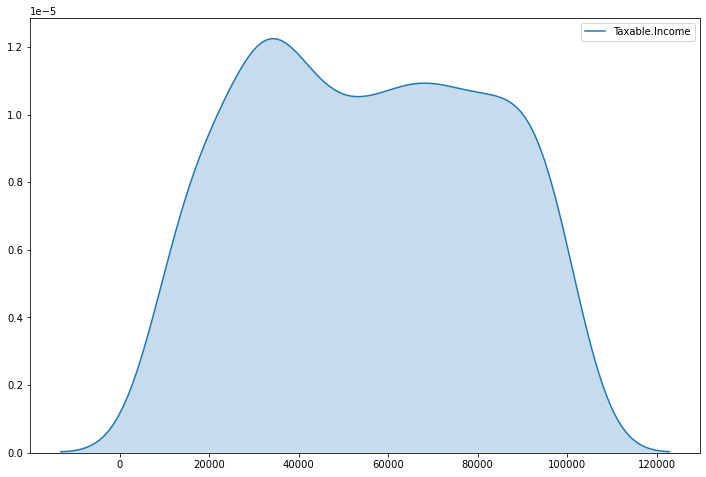

In [15]:
x = fc_df['Taxable.Income']
print("Skewness: %f" % stats.skew(x))
print("Kurtosis: %f" % stats.kurtosis(x))

plt.figure(figsize = (12, 8))

sns.kdeplot(fc_df['Taxable.Income'], shade = True)

<font size = 3 color = darkblue>Sales data is postively skewed and has negative kurtosis.</font>

In [16]:
# Get list of all columns with numerical data
num_col = fc_df.select_dtypes(exclude = 'object').columns.tolist()

In [17]:
# Boxplot for all columns with numerical data
fc_df.iplot(kind = 'box', keys = num_col)

In [18]:
data = []

for i in range(0, 6):
    trace = {
            "type": 'violin',
            "x": max(fc_df.iloc[:,i]),
            "y": fc_df.iloc[:,i],
            "name": list(fc_df.columns)[i],
            "box": {"visible": True},
            "meanline": {"visible": True}
        }
    data.append(trace)
        
fig = {
    "data": data,
    "layout" : {
        "title": "Violin plot of all stats",
        "yaxis": {"zeroline": False,}
    }
}

iplot(fig, filename = 'violin', validate = False)

In [19]:
# Histogram for all columns
fc_df.iplot(kind = 'histogram', subplots = True)

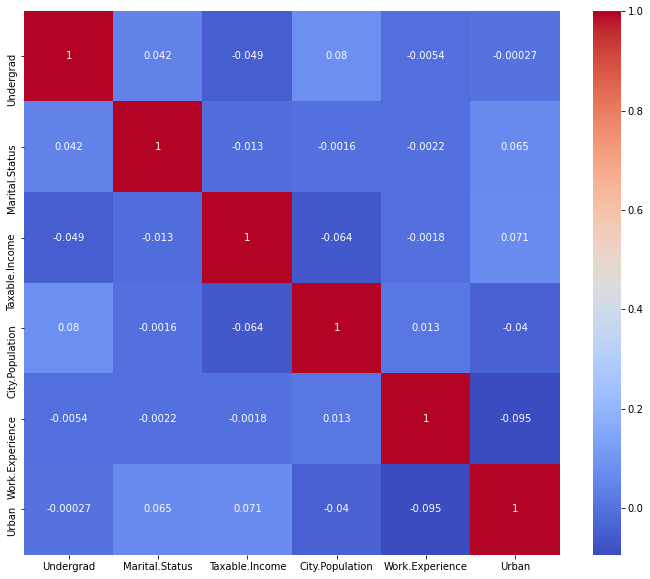

In [20]:
# Heatmap for fc_df data
corr = fc_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot = True, cmap = "coolwarm")

In [21]:
# We will consider those who have taxable_income <= 30000 as "Risky" and others are "Good"

for i in range(0, len(fc_df["Taxable.Income"])):
    if fc_df["Taxable.Income"][i] <= 30000:
        fc_df["Taxable.Income"][i] = "Risky"
    else:
        fc_df["Taxable.Income"][i] = "Good"

In [22]:
X = fc_df.drop("Taxable.Income", axis=1)
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [23]:
Y = fc_df["Taxable.Income"]
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: object

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#from six import StringIO
#from pydotplus import graphviz
#import pydotplus
#from PIL import Image

In [25]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

In [26]:
# Perform training with giniIndex
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 3, min_samples_leaf = 5)

# Performing training
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [27]:
# Decision tree with entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)

# Performing training
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [28]:
# Predicton on test with giniIndex
print("Results Using Gini Index:")

y_pred = clf_gini.predict(X_test)
print("Predicted values:")
print(y_pred)

Results Using Gini Index:
Predicted values:
['Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good']


In [29]:
# Calculate accuracy
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

print(" ")

print("Accuracy : ", accuracy_score(y_test, y_pred) * 100)

print(" ")

print("Report : ", classification_report(y_test, y_pred))

Confusion Matrix:  [[96  0]
 [24  0]]
 
Accuracy :  80.0
 
Report :                precision    recall  f1-score   support

        Good       0.80      1.00      0.89        96
       Risky       0.00      0.00      0.00        24

    accuracy                           0.80       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.64      0.80      0.71       120



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [30]:
print("Results Using Entropy:")

# Prediction using entropy
y_pred_entropy = clf_entropy.predict(X_test)
print("Predicted values:")
print(y_pred)

Results Using Entropy:
Predicted values:
['Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good']


In [31]:
# Calculate accuracy
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_entropy))

print(" ")

print("Accuracy : ", accuracy_score(y_test, y_pred_entropy) * 100)

print(" ")

print("Report : ", classification_report(y_test, y_pred_entropy))

Confusion Matrix:  [[96  0]
 [24  0]]
 
Accuracy :  80.0
 
Report :                precision    recall  f1-score   support

        Good       0.80      1.00      0.89        96
       Risky       0.00      0.00      0.00        24

    accuracy                           0.80       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.64      0.80      0.71       120



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [32]:
text_rep_gini = tree.export_text(clf_gini)
print(text_rep_gini)

|--- feature_2 <= 63521.00
|   |--- feature_2 <= 54407.00
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: Good
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: Good
|   |--- feature_2 >  54407.00
|   |   |--- feature_2 <= 60294.50
|   |   |   |--- class: Good
|   |   |--- feature_2 >  60294.50
|   |   |   |--- class: Good
|--- feature_2 >  63521.00
|   |--- feature_2 <= 140941.50
|   |   |--- feature_2 <= 126754.50
|   |   |   |--- class: Good
|   |   |--- feature_2 >  126754.50
|   |   |   |--- class: Good
|   |--- feature_2 >  140941.50
|   |   |--- feature_2 <= 188225.00
|   |   |   |--- class: Good
|   |   |--- feature_2 >  188225.00
|   |   |   |--- class: Good



In [33]:
text_rep_entropy = tree.export_text(clf_entropy)
print(text_rep_entropy)

|--- feature_2 <= 63521.00
|   |--- feature_2 <= 54407.00
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: Good
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: Good
|   |--- feature_2 >  54407.00
|   |   |--- feature_2 <= 60294.50
|   |   |   |--- class: Good
|   |   |--- feature_2 >  60294.50
|   |   |   |--- class: Good
|--- feature_2 >  63521.00
|   |--- feature_2 <= 140941.50
|   |   |--- feature_2 <= 126754.50
|   |   |   |--- class: Good
|   |   |--- feature_2 >  126754.50
|   |   |   |--- class: Good
|   |--- feature_2 >  140941.50
|   |   |--- feature_2 <= 188225.00
|   |   |   |--- class: Good
|   |   |--- feature_2 >  188225.00
|   |   |   |--- class: Good



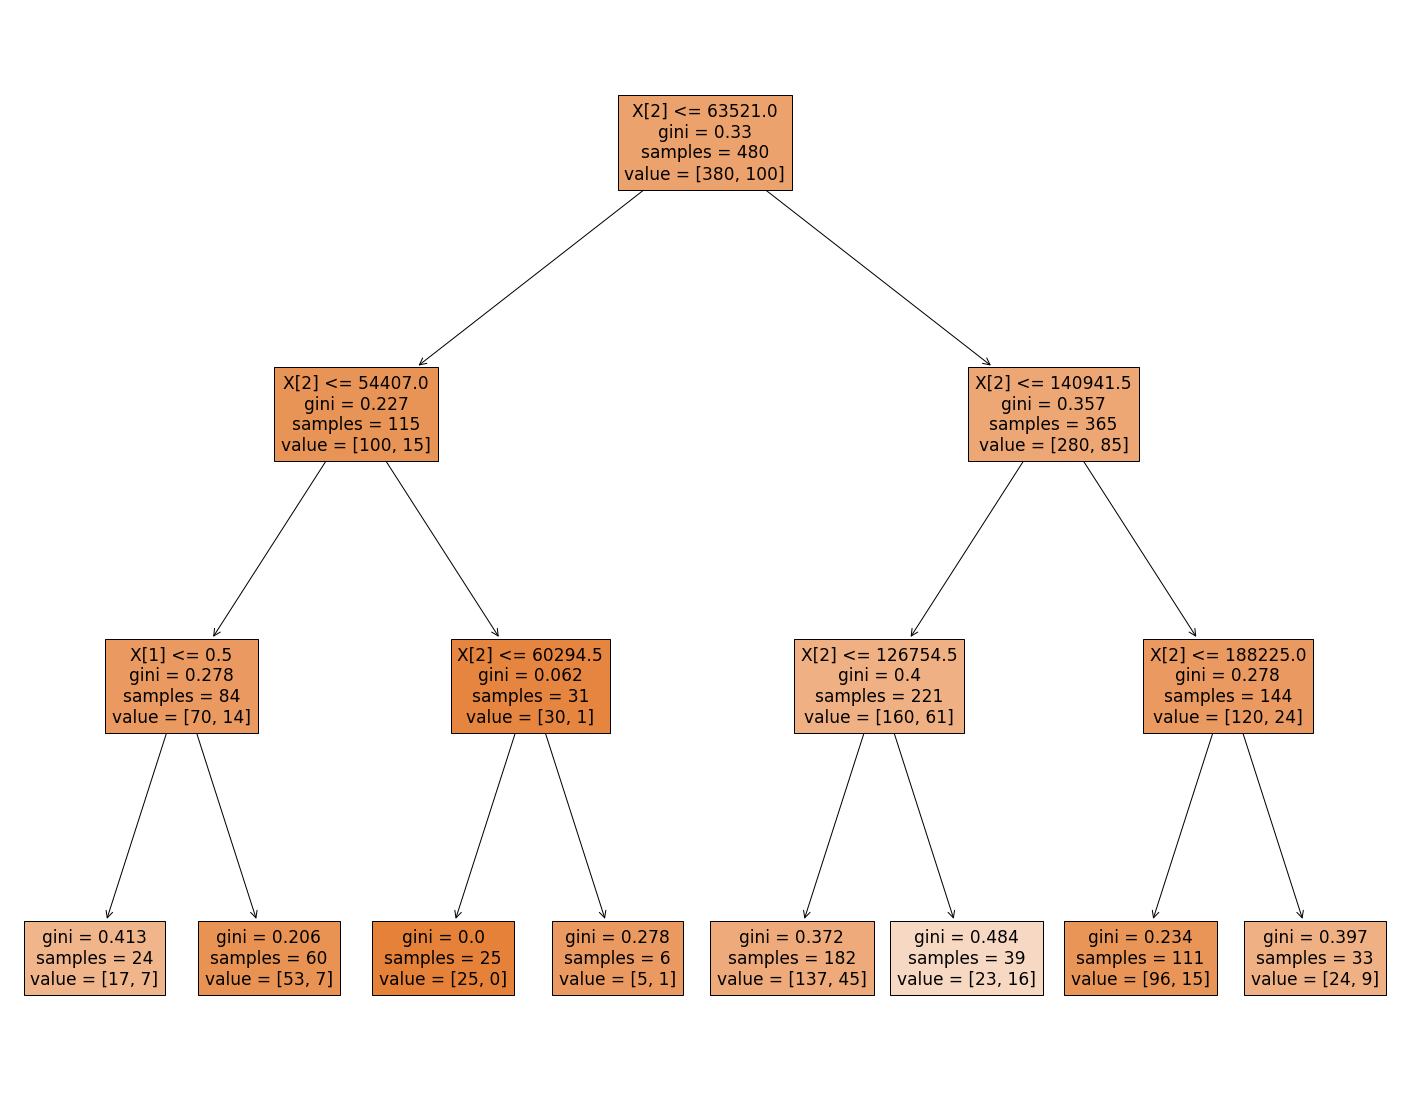

In [34]:
fig = plt.figure(figsize = (25, 20))
_ = tree.plot_tree(clf_gini, filled = True)

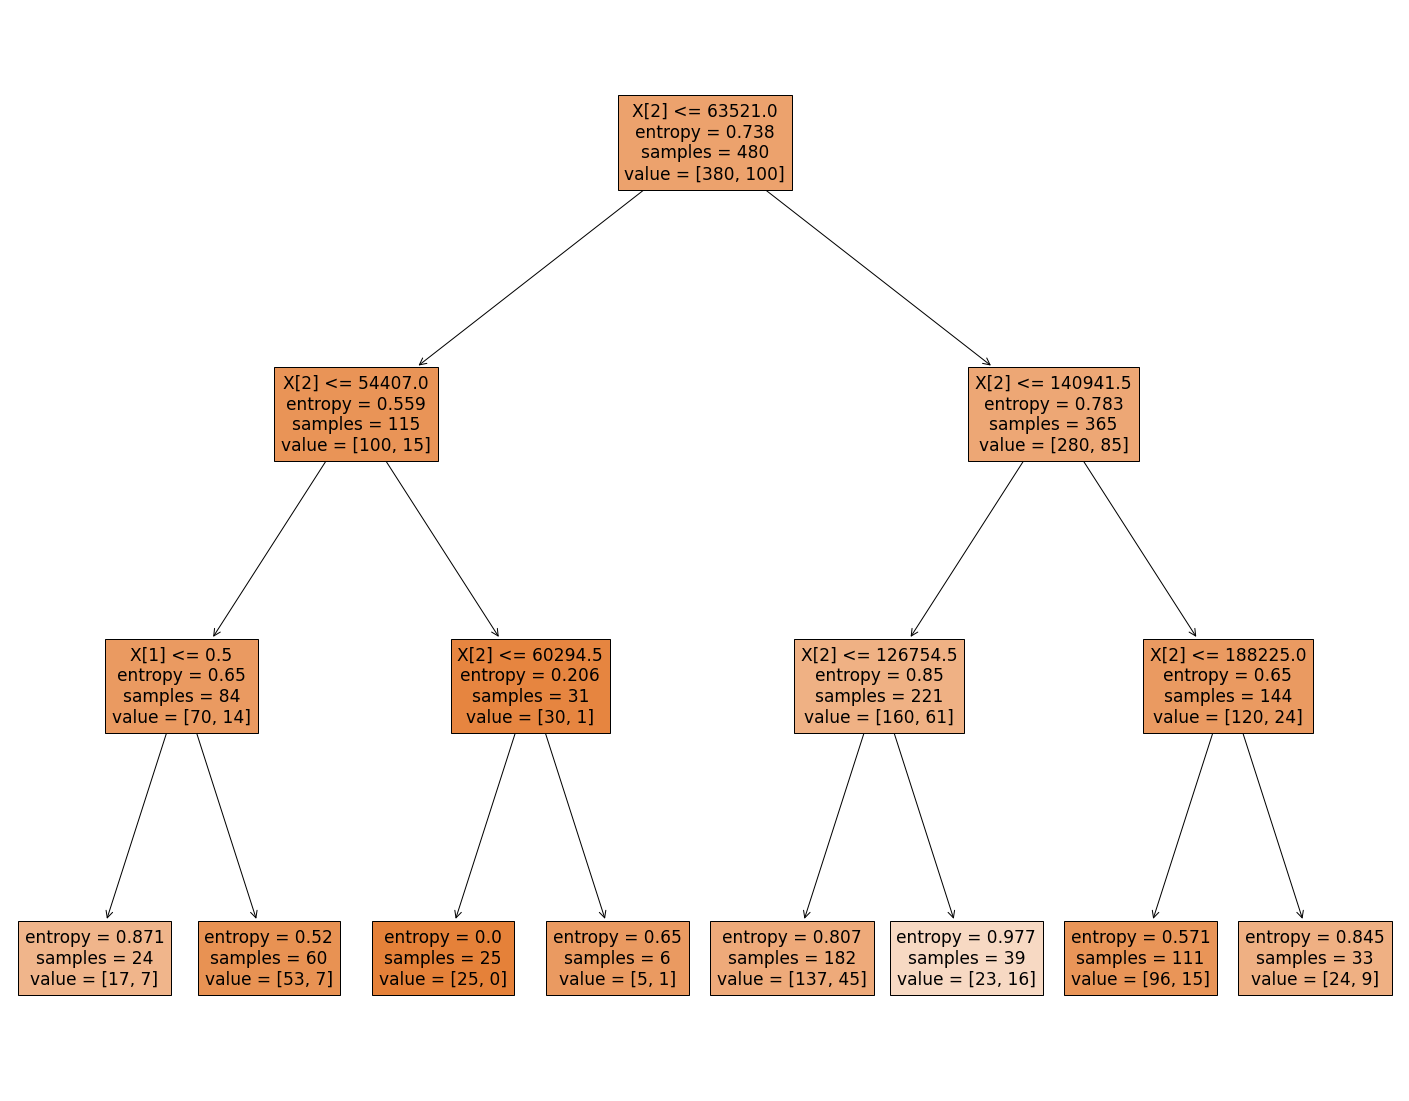

In [35]:
fig = plt.figure(figsize = (25, 20))
_ = tree.plot_tree(clf_entropy, filled = True)